In [5]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

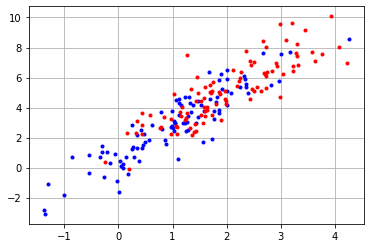

In [6]:
np.random.seed(12345)
nd = 100
x1p = np.random.randn(nd)+1
x1n = np.random.randn(nd)+2

x2p = x1p *2 + 1 + np.random.randn(nd)
x2n = x1n *2 + 1 + np.random.randn(nd)

x1 = np.concatenate([x1p, x1n])
x2 = np.concatenate([x2p, x2n])

xs = np.vstack([x1, x2]) #now the index for data point is the second index.
ys = np.concatenate([[1]*nd, [-1]*nd])
plt.plot(x1[ys>0], x2[ys>0], '.b')
plt.plot(x1[ys<0], x2[ys<0], '.r')
plt.grid(True)


In [7]:
xs.shape

(2, 200)

In [13]:
np.std(x1)

1.1040407788481097

1) Normalize the data so that the mean of each feature is 0 and standard deviation of each feature is 1.

In [21]:
norm_x1 = (x1 - np.mean(x1))/np.std(x1)
norm_x2 = (x2 - np.mean(x2))/np.std(x2)

norm_xs = np.vstack([norm_x1, norm_x2])

In [18]:
np.mean(norm_x1), np.std(norm_x1)

(3.552713678800501e-17, 1.0)

In [19]:
np.mean(norm_x2), np.std(norm_x2)

(-7.105427357601002e-17, 1.0)

2) What is the criteria for picking better axis?

In [ ]:
# get one with maximum variance

3) What is the size of the covariance matrix? Why?

In [25]:
# n_feature x n_feature

covariance = np.cov(norm_xs)
covariance

array([[1.00502513, 0.9100822 ],
       [0.9100822 , 1.00502513]])

4) Find eigenvalue and eigenvector of the covariance matrix.

In [27]:
evalues, evectors = np.linalg.eig(covariance)

In [28]:
evalues

array([1.91510732, 0.09494293])

In [29]:
evectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [42]:
np.dot(covariance,evectors[:,0]) # = lambda * evec

array([1.35418538, 1.35418538])

In [43]:
evalues[0]* evectors[:,0]

array([1.35418538, 1.35418538])

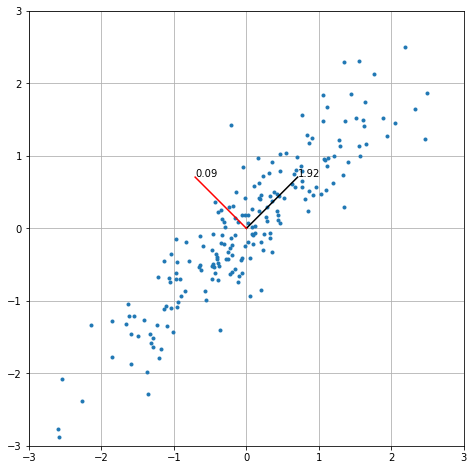

In [54]:
plt.figure(figsize=(8,8))
plt.plot(norm_xs[0, :], norm_xs[1, :], '.')
v0 = evectors[:, 0]
plt.plot([0, v0[0]], [0, v0[1]], '-k')
v1 = evectors[:, 1]
plt.plot([0, v1[0]], [0, v1[1]], '-r')
plt.xlim(-3,3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.text(v0[0], v0[1], f'{evalues[0]:.2f}') # A black
plt.text(v1[0], v1[1], f'{evalues[1]:.2f}') # B red
plt.grid()

5) Draw the eigenvectors on the plot.

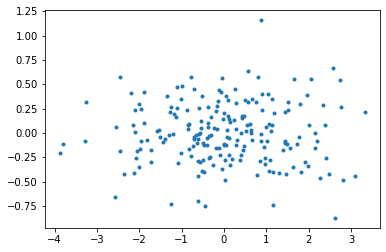

In [66]:
rotated_features_0 = np.dot(norm_xs.T, v0) # rotated reature on axis 0
rotated_features_1 = np.dot(norm_xs.T, v1) # rotated reature on axis 1

plt.plot(rotated_features_0, rotated_features_1, '.')

In [70]:
np.var(rotated_features_0)

1.9055317880978748

In [71]:
1.91510732

1.91510732

6) Use eigenvector and compute the transformed feature vector.

7) Plot transformed data point.

# Handwritten Digit Recognition.

In [72]:
D = loadmat('usps_resampled/usps_resampled.mat')
print(D)
#it is a dictionary of four elements
# train_labels for the number of each training image
# train_patterns for the train images
# test_labels
# test_patterns

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Fri Dec  3 17:13:58 2004', '__version__': '1.0', '__globals__': [], 'train_patterns': array([[-0.99999988, -0.99999982, -0.99999988, ..., -0.9999997 ,
        -0.99997759, -0.99993992],
       [-0.9999997 , -0.99999845, -0.99999988, ..., -0.99996912,
        -0.99797225, -0.99719542],
       [-0.99998665, -0.99989259, -0.99999988, ..., -0.9983288 ,
        -0.96142083, -0.95687085],
       ...,
       [-0.93985581, -0.76438236, -0.99999988, ..., -0.99999988,
        -0.97830033, -0.99999988],
       [-0.99104893, -0.93247736, -0.99999988, ..., -0.99999988,
        -0.99563289, -0.99999988],
       [-0.99916363, -0.99033844, -0.99999988, ..., -0.99999988,
        -0.99974871, -0.99999988]]), 'train_labels': array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1

(256, 4649)


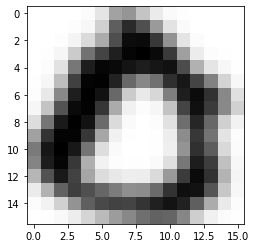

In [136]:
images = D['train_patterns']
print(images.shape)
def show(img):
    im = img.reshape(16,16) #you can try print it
    plt.imshow(im, interpolation='none', cmap=cm.Greys)
show(images[:,1])


labels = np.argmax(D['train_labels'], axis=0)


In [88]:
# normalize
mean = np.mean(images, axis=1)[:, None]
std = np.std(images, axis=1)[:, None]
norm_images = (images - mean)/std

In [101]:
# covariance matrix
cov_images = np.cov(norm_images)
cov_images.shape

(256, 256)

In [108]:
evalues, evectors = np.linalg.eig(cov_images)
evalues.shape, evectors.shape

((256,), (256, 256))

In [109]:
first_20 = evectors[:, :20]

In [139]:
np.var(rotated[:,1])

26.094639719992365

In [122]:
rotated = np.dot(norm_images.T, first_20)
rotated.T
print(rotated[0])

[-13.61907884  -8.81839025   3.82839416  -3.06933053   0.04157478
  -3.4347987   -0.47250136  -0.43500739  -0.61416442  -5.14011996
   3.88932905  -5.3967301   -0.09140729   1.19656861   3.60834037
  -1.31568855   3.57245859   2.26030459  -0.1618591    1.86591869]


In [128]:
pca1 = rotated[:,0]
pca2 = rotated[:,1]

No handles with labels found to put in legend.


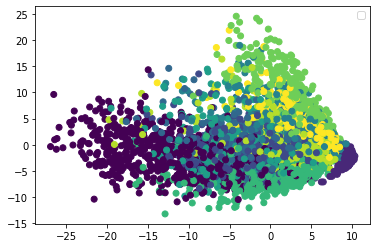

In [140]:
plt.scatter(pca1, pca2, c=labels)


In [89]:
np.mean(norm_images[2,:]) # second pixel of every sample

-7.947563402780213e-17

In [90]:
np.std(norm_images[2,:])

1.0000000000000062

In [79]:
np.mean(images, axis=1).shape

(256,)

In [144]:
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [194]:
pipe = Pipeline([
    ('pca', PCA(20)),
    ('logistic', LogisticRegression())
])

In [195]:
pipe.fit(images.T, labels)

c:\users\jellydonuts\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('pca', PCA(n_components=20)),
                ('logistic', LogisticRegression())])

In [196]:
result = pipe.predict(images.T)

In [197]:
print(np.sum(labels==result)/len(result)) 
print(len(result))

0.9346095934609594
4649


In [198]:
test_images = D['test_patterns']
test_labels = np.argmax(D['test_labels'], axis=0)

In [199]:
result = pipe.predict(test_images.T)
print(np.sum(test_labels==result)/len(result)) 
print(len(result))

0.9247149924714992
4649
